In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tqdm
import random

%matplotlib inline

In [2]:
plt.rcParams['font.size']=12
plt.rcParams['font.family']='Times new roman'

## Get data

In [3]:
#Get master dataframe
data = pd.read_csv('master_df.csv', sep = ';')
data = data.drop('Unnamed: 0', axis=1)
data["date"] = pd.to_datetime(data['date'])

In [4]:
#get tickers list and create dictionary
tickers = data['Ticker'].unique()

In [6]:
#get stock information
stock_info = pd.read_csv('Nasdaq mkt. cap 50m+.csv')
stock_info = stock_info.drop(['Last Sale', 'Country', 'IPO Year'], axis = 1)

#create dictionary with symbol and sector
sectors_dict = dict(zip(stock_info['Symbol'], stock_info['Sector']))
sectors_dict

#Create dictionary with symbol and marketcap
mc_dict = dict(zip(stock_info['Symbol'],stock_info['Market Cap']))

In [11]:
#Add sector to dataframe

data['Sector'] = data['Ticker'].map(sectors_dict)

# Visualization

## Raw data

First let's visualize the prices of some stocks:

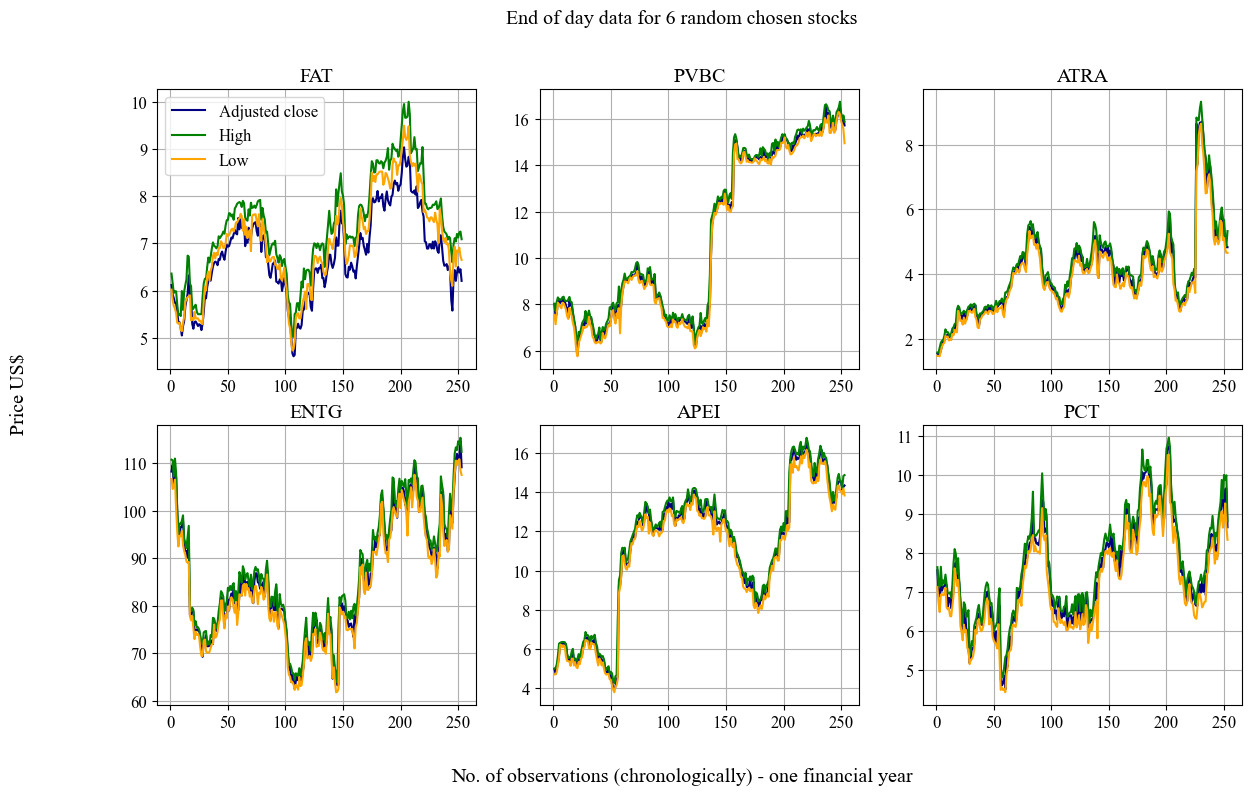

In [12]:
data = pd.read_csv('master_df.csv', sep = ';')
data['date']=pd.to_datetime(data['date'])
data = data.drop('Unnamed: 0', axis=1)
#data.set_index('date', inplace = True)
#data.sort_index(ascending = True)
fig, ax = plt.subplots(2,3, figsize = (14,8))

for i in range(2):
    for j in range(3):
        tic = random.choice(tickers)
        data_vi = data[data['Ticker']==tic]
        x=np.linspace(1,len(data_vi),len(data_vi))
        ax[i][j].plot(x,data_vi['adjusted_close'], label = 'Adjusted close', color = 'navy')
        ax[i][j].plot(x,data_vi['high'], label = 'High', color = 'green')
        ax[i][j].plot(x,data_vi['low'], label = 'Low', color = 'orange')
        ax[i][j].set_title(tic)
        ax[i][j].grid(True)
ax[0][0].legend()
fig.supxlabel('No. of observations (chronologically) - one financial year')
fig.supylabel('Price US$')
fig.suptitle('End of day data for 6 random chosen stocks')
plt.savefig('6 random stocks.png')

Now let's take a look at returns, as it is exactly what we want to predict

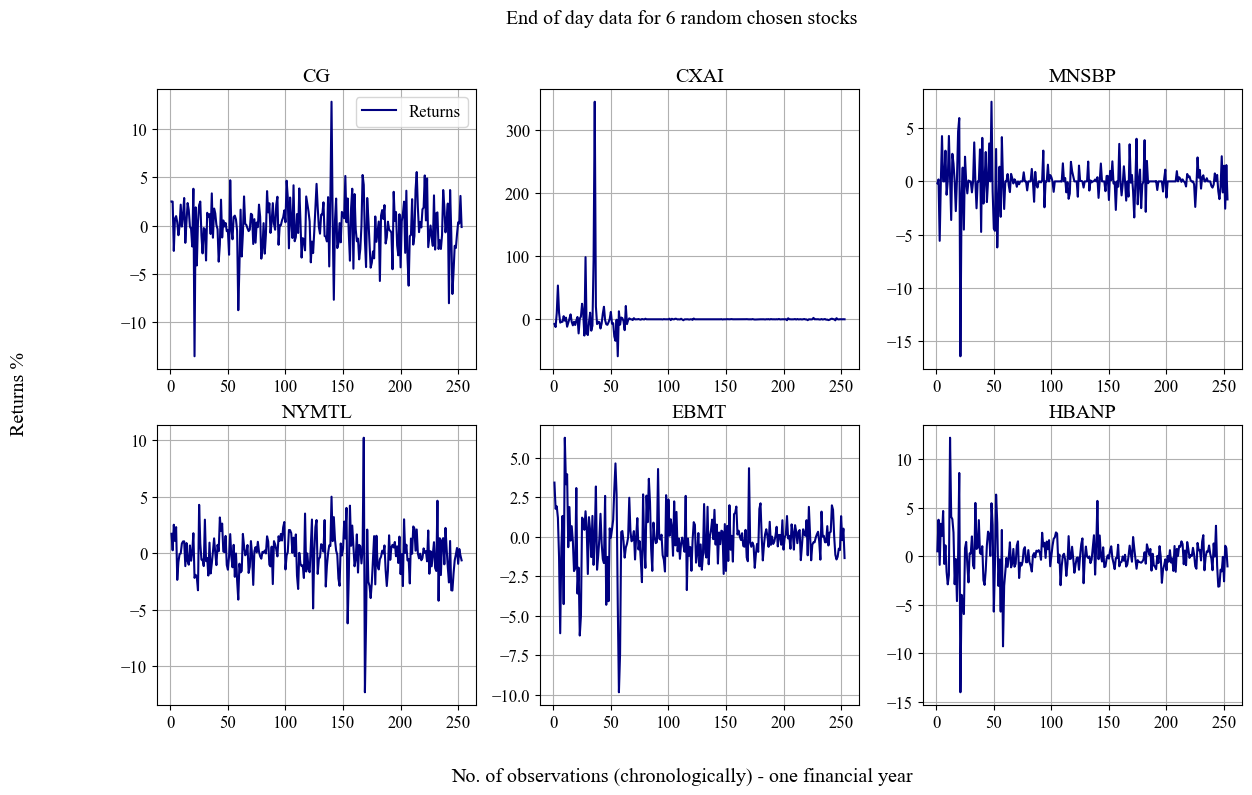

In [13]:
data = pd.read_csv('master_df.csv', sep = ';')
data['date']=pd.to_datetime(data['date'])
data = data.drop('Unnamed: 0', axis=1)
fig, ax = plt.subplots(2,3, figsize = (14,8))

for i in range(2):
    for j in range(3):
        tic = random.choice(tickers)
        data_vi = data[data['Ticker']==tic]
        x=np.linspace(1,len(data_vi),len(data_vi))
        ax[i][j].plot(x,data_vi['returns'], label = 'Returns', color = 'navy')
        ax[i][j].set_title(tic)
        ax[i][j].grid(True)
ax[0][0].legend()
fig.supxlabel('No. of observations (chronologically) - one financial year')
fig.supylabel('Returns %')
fig.suptitle('End of day data for 6 random chosen stocks')
plt.savefig('returns.png')

Now let's take a look of all the data for one random stock:

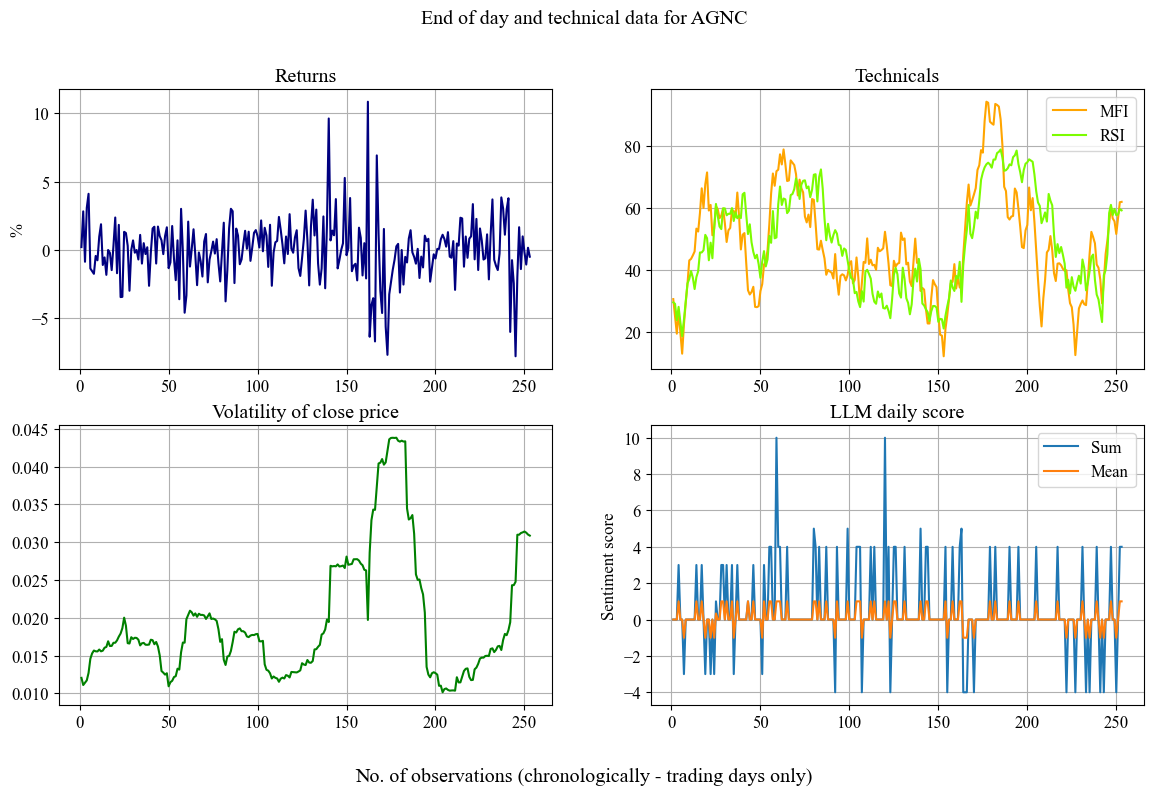

In [14]:
data = pd.read_csv('master_df.csv', sep = ';')
data['date']=pd.to_datetime(data['date'])
data = data.drop('Unnamed: 0', axis=1)
fig, ax = plt.subplots(2,2, figsize = (14,8))

#tic = random.choice(tickers)
tic = 'AGNC'
data_vi = data[data['Ticker']==tic]
x=np.linspace(1,len(data_vi),len(data_vi))
ax[0][0].plot(x,data_vi['returns'], color = 'navy')
ax[0][0].set_title("Returns")
ax[0][0].set_ylabel("%")
ax[0][0].grid(True)

ax[1][0].plot(x,data_vi['volatility'], color = 'green')
ax[1][0].set_title("Volatility of close price")
ax[1][0].grid(True)

ax[0][1].plot(x,data_vi['MFI'], color = 'orange', label = "MFI")
ax[0][1].plot(x,data_vi['RSI'], color = 'lawngreen', label = "RSI")
ax[0][1].set_title("Technicals")
ax[0][1].grid(True)
ax[0][1].legend()

ax[1][1].plot(x,data_vi['LLM_score_sum'], label = 'Sum')
ax[1][1].plot(x,data_vi['LLM_score_mean'], label = 'Mean')
ax[1][1].set_title("LLM daily score")
ax[1][1].grid(True)
ax[1][1].set_ylabel("Sentiment score")
ax[1][1].legend()

fig.supxlabel('No. of observations (chronologically - trading days only)')
fig.suptitle(f'End of day and technical data for {tic}')
plt.savefig('1 stock.png')

### Visualization of stocks and sectors

In [15]:
data.groupby('Sector')['Ticker'].nunique()

KeyError: 'Sector'

In [16]:
#Get master dataframe
data = pd.read_csv('master_df.csv', sep = ';')
data = data.drop('Unnamed: 0', axis=1)
data["date"] = pd.to_datetime(data['date'])
data['Sector'] = data['Ticker'].map(sectors_dict)

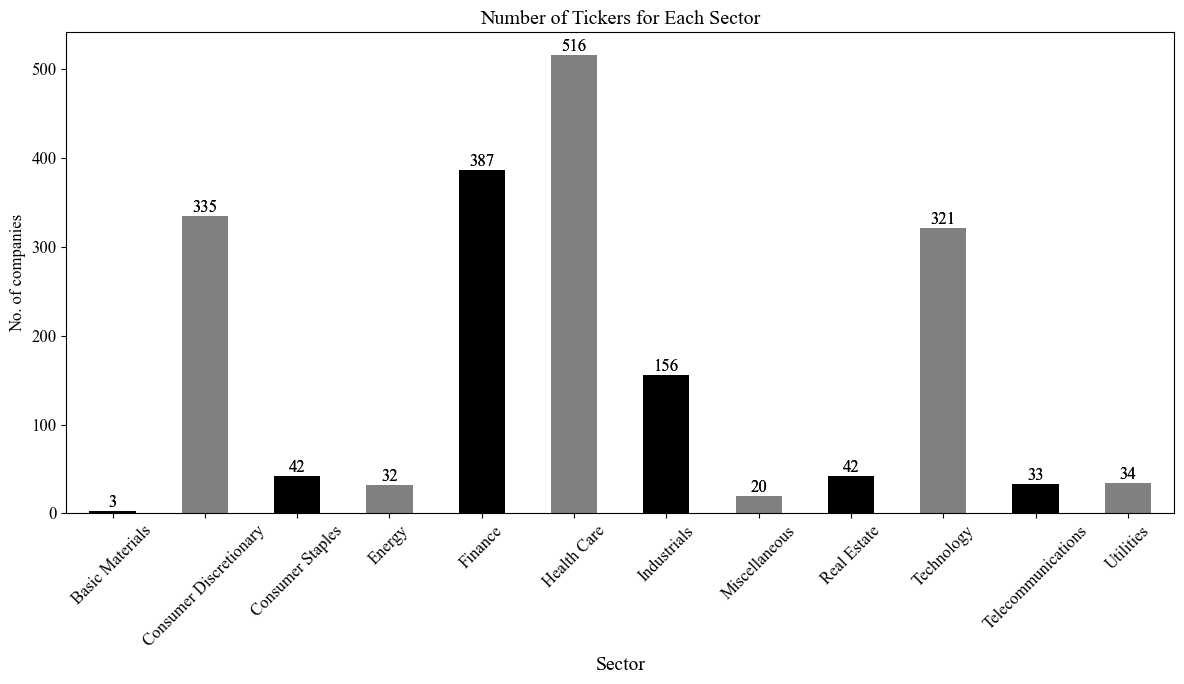

In [220]:
sector_counts = data.groupby(['Sector'])['Ticker'].nunique()

colors = ["black", "gray"]

# Create a bar chart
plt.figure(figsize=(12, 7))
sector_counts.plot(kind='bar', color='skyblue')
bars = sector_counts.plot(kind='bar', color=colors)
plt.title('Number of Tickers for Each Sector')
plt.xlabel('Sector', fontsize = 14)
plt.ylabel('No. of companies')
plt.xticks(rotation=45)

# Display counts on top of bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height()):d}',
        ha='center',
        va='bottom'
    )
plt.tight_layout()

# Display the plot
plt.savefig('Sector distribution')
plt.show()


### Visualization of number of news per company

In [19]:
news_df = pd.read_csv('news_final_sentiment_API.csv').drop(["Unnamed: 0", "LLM_score"], axis = 1)

C:\Users\Soren\AppData\Local\Temp\ipykernel_34836\1671544048.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  news_df = pd.read_csv('news_final_sentiment_API.csv').drop(["Unnamed: 0", "LLM_score"], axis = 1)


In [20]:
news_df["market_cap"]=news_df["ticker"].map(mc_dict)

In [36]:
# Define the market cap intervals and labels

intervals = [5e7,3e8,2e9,2e10,2e11,2e13]

labels = ['50M - 300M', '300M - 2B', '2B - 10B', '10B - 200B','> 200B']

# Create the new categorical variable
news_df['market_cap_cathegory'] = pd.cut(news_df['market_cap'], bins=intervals, labels=labels, right=False)

In [54]:
title_counts_by_category = news_df.groupby(['market_cap_cathegory'])['title'].count() / news_df.groupby(['market_cap_cathegory'])['ticker'].nunique()
title_counts_by_category

market_cap_cathegory
50M - 300M     37.717220
300M - 2B      59.024624
2B - 10B      127.073529
10B - 200B    398.834951
> 200B        989.538462
dtype: float64

In [60]:
colors = ["black", "gray", "lightgray", "silver", "darkgray"]
# Create a bar plot
plt.figure(figsize=(10, 6))
title_counts_by_category.plot(kind='bar')
bars = title_counts_by_category.plot(kind='bar', color=colors)
plt.title('Number of Titles for Each Market Cap Category')
plt.xlabel('Market Cap Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height()):d}',
        ha='center',
        va='bottom'
    )
plt.tight_layout()
plt.show()
plt.savefig('News marketcap.png')


TypeError: figure() got multiple values for argument 'figsize'